In [3]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy import stats
import inspect
import os
import csv 
import time
import sys
import glob
import pandas as pd
import re

from tvb.simulator.lab import *
from tvb.simulator.plot.tools import *

# Input Simulation Pipeline
from SimulationPipeline import *
from useful_fns import *

from scipy.integrate import odeint
from scipy.optimize import fsolve
import random

import seaborn as sns

#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [ ]:
reader = csv.reader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'), delimiter=',', quotechar='|')

ParamsDict = {}
for row in reader:
    #print(', '.join(row))
    print(row[0])

In [3]:
reader = csv.DictReader(open('do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'))

result = {}
for row in reader:
    print(', '.join(row))

FileNotFoundError: [Errno 2] No such file or directory: 'do-not-track\\LCycle_G[0.1]_MouseCortex_Params_20200802-201751_.csv'

In [4]:
dictobj

NameError: name 'dictobj' is not defined

In [5]:
# Empty dict
ParamsDict = { }
ParamsDict["name"] = "MouseCortex"
ParamsDict["G"] = np.array([1.9]) 
ParamsDict["REMOVE"] = [7]
ParamsDict["BINARY"]=True

# Ye dunno why having the closing square bracket messes up glob glob. 
Sim_run_files = glob.glob("do-not-track/LCycle_G[0.4*_.csv")
print(Sim_run_files)

# Read file import data
#df = pd.read_csv(all_files[11],delimiter="\t",header=None)
# Genfromtxt gives us a np array. 
df = np.genfromtxt(Sim_run_files[-1],delimiter="\t")

bold_time = df[0]
bold_data = df[1:]

# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file(os.getcwd() +"/Connectomes/" + ParamsDict["name"] + ".zip")

# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0

SCM = con.weights

# current_calculator(bold_data,ParamsDict["G"],con.weights)

[]


IndexError: list index out of range

In [6]:
# External Current Calculator:
J_e = []
#len(bold_time)
for j in np.arange(1000):       
    t_0 = []
    # Specific column (or time point)
    for i in np.arange(SCM.shape[0]): 
        # Sum over all external currents (May need to do SCM[:,i] instead)  
        t  = sum(bold_data[:,j]*SCM[:,i])
        # To obtain currents to particular region
        t_0.append(t)
    J_e.append(t_0)

J_e = np.array(J_e)
print("Max",np.max(J_e))
print("Median",np.median(J_e))
print("Min",np.min(J_e))

NameError: name 'SCM' is not defined

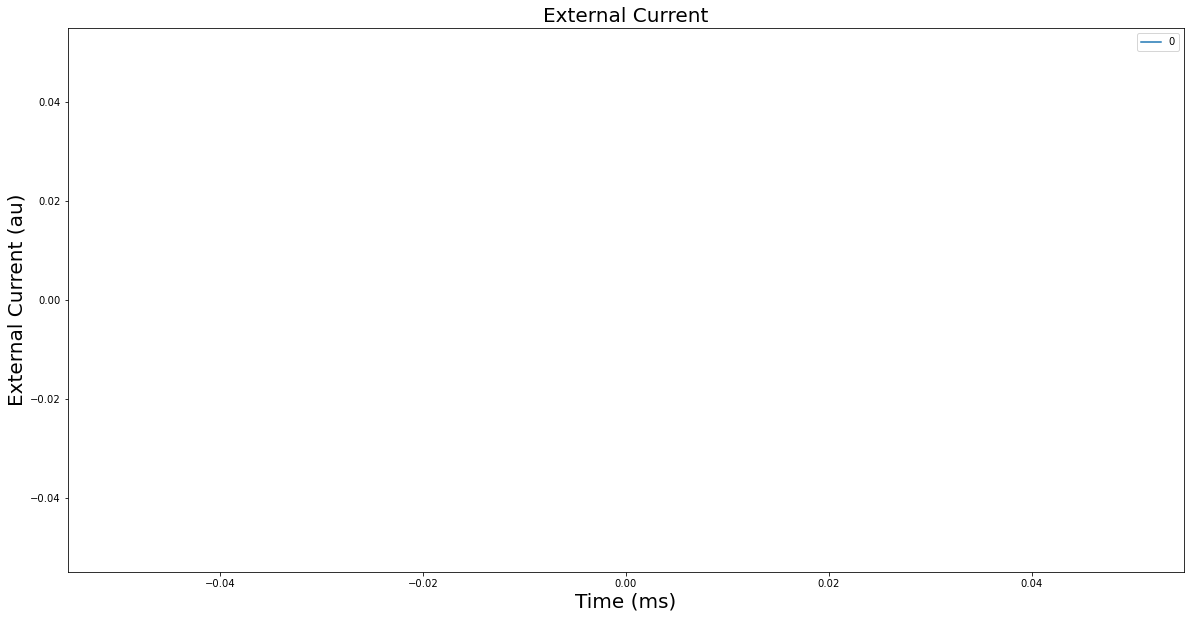

In [7]:
plt.plot(J_e)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('External Current (au)', fontsize=20)
plt.title('External Current', fontsize=20)
#plt.legend(('0','1','2','3','4'))
plt.legend(range(38))
plt.show()

In [8]:
# Set up input Parameters for entire pipeline as dictionary elements here:

# Empty dict
ParamsDict = { }

# Name of import file/zip - Which contains connectivity data.
ParamsDict["name"] = "3Regions"

# Monitors or not?  (Aka BOLD or not?)
ParamsDict["BOLD"] = False

# Change to Binary Connectome? (If True, will change the connectome into binary)
ParamsDict["BINARY"] = True

# Snip is the the number of elements you wish to snip at the start to remove the initial condition effects.
ParamsDict["Snip"] = 10
# Note, if BOLD = False, Snip gets multiplied by 1000. 
if ParamsDict["BOLD"] == False:
    ParamsDict["Snip"] = 100 * ParamsDict["Snip"]

# Set the Random State/Seed for the Stochastic Integrator:
ParamsDict["RandState"] = 118

# Set Simulation Length:
ParamsDict["Simul_length"] = 1.2e3

# Set Linear Coupling Constant:
ParamsDict["G"] = np.array([0.47])

# Set integrator time step dt.
ParamsDict["dt"] = 0.1

# Remove ith indexed region (7 corresponds to Frontal Pole Cerebral Cortex) - Give it a list if removing multiple regions.  Empty list removes nothing. 
# ParamsDict["REMOVE"] = [7]

# Set Additive Noise strength
ParamsDict["noise"] = np.array([0.000013])  

# Params Dict tag (extra note tags for the name - Example to denote what's being changed/looped.)
ParamsDict["tag"] = "Single"

# Set Wilson Cowan Model Parameters
ParamsDict["MODEL_c_ee"] = np.array([11.0])
ParamsDict["MODEL_c_ei"] = np.array([10.0])
ParamsDict["MODEL_c_ie"] = np.array([10.0])
ParamsDict["MODEL_c_ii"] = np.array([1.0])

# Define the model. 
ParamsDict["MODEL"] = models.WilsonCowan(c_ee=ParamsDict["MODEL_c_ee"],c_ei=ParamsDict["MODEL_c_ei"],c_ie=ParamsDict["MODEL_c_ie"] ,c_ii=ParamsDict["MODEL_c_ii"],
                                        a_e=numpy.array([1.0]),a_i=numpy.array([1.0]),b_e=numpy.array([1.3]),b_i=numpy.array([2.8]),tau_e=numpy.array([10.0]),
                                        tau_i=numpy.array([65.0])) 


# Load the connectivity data from a zip file. 
con = connectivity.Connectivity.from_file("C:\\Users\\Pok Him\\Desktop\\MouseBrainModelling\\Connectomes\\" + ParamsDict["name"] + ".zip")

# Mouse Allen Connectivity (from within TVB)
# con = connectivity.Connectivity.from_file("../mouse/allen_2mm/Connectivity.h5")

# Change to Connectome to Binary if desired:
if ParamsDict["BINARY"]==True:
    con.weights = con.weights!=0
'''
# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)
con.centres = np.delete(con.centres,ParamsDict["REMOVE"])
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)
con.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)
con.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)

# Number of regions
con.number_of_regions = con.weights.shape[0]
'''

WARNING  File 'hemispheres' not found in ZIP.


'\n# Remove the ith row and column in centres, tract_lengths and weights. i.e. the specified region(s)\ncon.centres = np.delete(con.centres,ParamsDict["REMOVE"])\ncon.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=0)\ncon.weights = np.delete(con.weights,obj=ParamsDict["REMOVE"],axis=1)\ncon.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=0)\ncon.tract_lengths = np.delete(con.tract_lengths,obj=ParamsDict["REMOVE"],axis=1)\n\n# Number of regions\ncon.number_of_regions = con.weights.shape[0]\n'

In [9]:
# Set the parameter of the resting state simulation

if ParamsDict["BOLD"] == True:
    sim = simulator.Simulator(model=ParamsDict["MODEL"],
                            connectivity=con,
                            coupling=coupling.Linear(a=ParamsDict["G"]),
                            integrator=integrators.HeunStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                            monitors=(monitors.Bold(period=2e3),
                                      monitors.TemporalAverage(period=1e3)),
                            simulation_length=ParamsDict["Simul_length"],
                            #initial_conditions=[1.8,1.8,1.8,1.8,1.8]
                            ).configure()
    # Run the resting state simulation
    (bold_time, bold_data), _ = sim.run()

    # Display the simulated bold timeseries
    plt.subplots()
    plt.plot(bold_time,bold_data[:,0,:,0])
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Amplitude (au)', fontsize=20)
    plt.title('Simulated BOLD timeseries', fontsize=20)
    plt.legend(('0','1','2','3','4'))

# No Monitors 
else:
    sim = simulator.Simulator(model=ParamsDict["MODEL"],
                            connectivity=con,
                            coupling=coupling.Linear(a=ParamsDict["G"]),
                            integrator=integrators.EulerStochastic(dt=ParamsDict["dt"],noise=noise.Additive(nsig=ParamsDict["noise"],
                                        random_stream=np.random.RandomState(ParamsDict["RandState"]))),
                            simulation_length=ParamsDict["Simul_length"],
                            initial_conditions=0.5 + numpy.zeros((con.number_of_regions*con.number_of_regions,2,con.number_of_regions,1)), # numpy.ones((n * n, 1, n, 1)),
                            ).configure()
    # Run the resting state simulation
    awer = sim.run()
    bold_time = awer[0][0]
    bold_data = awer[0][1]

    # Display the simulated non-bold timeseries
    # Display the simulated non-bold timeseries
    plt.subplots()
    plt.plot(bold_time,bold_data[:,0,:,0])
    plt.xlabel('Time (ms)', fontsize=20)
    plt.ylabel('Amplitude (au)', fontsize=20)
    plt.title('Simulated non-BOLD timeseries', fontsize=20)
    plt.legend(np.arange(38))
    plt.grid()

ValueError: Incorrect history sample shape (2, 0, 1), expected (2, 3, 1)

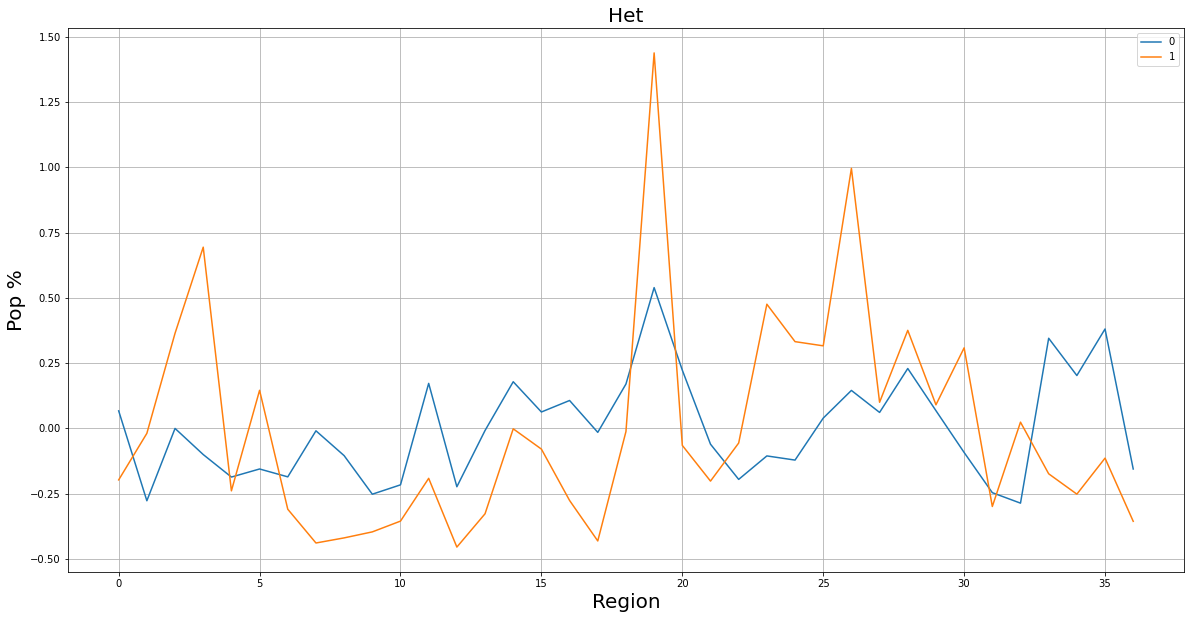

In [33]:
df = pd.read_csv("CortexDensitiesAlter.csv",delimiter=",")
E_pop = df.excitatory.values
I_pop = df.inhibitory.values
E_mean = np.mean(E_pop)
I_mean = np.mean(I_pop)

# E_normalised is (when excluding region 7) -0.28 to 0.54
E_normalised = (E_pop-E_mean)/E_mean
# I_normalised is (when excluding region 7) -0.45 to 1.44
I_normalised = (I_pop-I_mean)/I_mean

# Graph it: 
plt.plot(E_normalised)
plt.plot(I_normalised)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Pop %', fontsize=20)
plt.title('Het', fontsize=20)
plt.grid()
plt.legend(np.arange(2))
plt.show()



In [44]:
print(np.max(E_normalised))
print(np.min(E_normalised))
print(np.max(I_normalised))
print(np.min(I_normalised))

numpy.linspace(start=-0.28,stop=0.54,num=37)

0.5392677506855525
-0.28616841357716255
1.4381600972597013
-0.4544597496377836


array([-0.28      , -0.25722222, -0.23444444, -0.21166667, -0.18888889,
       -0.16611111, -0.14333333, -0.12055556, -0.09777778, -0.075     ,
       -0.05222222, -0.02944444, -0.00666667,  0.01611111,  0.03888889,
        0.06166667,  0.08444444,  0.10722222,  0.13      ,  0.15277778,
        0.17555556,  0.19833333,  0.22111111,  0.24388889,  0.26666667,
        0.28944444,  0.31222222,  0.335     ,  0.35777778,  0.38055556,
        0.40333333,  0.42611111,  0.44888889,  0.47166667,  0.49444444,
        0.51722222,  0.54      ])

In [27]:
# Now Import our data from our data folder:

# Get Scorr csv filenames in a folder
Scorr_files = glob.glob("D:\Simulations\\20_8_8\*Scorr*.csv")
# The last number is of hrs_mins_secs HHMMSS

print(Scorr_files)

['D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.05]_MouseCortex_Scorr_20200808-203629_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.15]_MouseCortex_Scorr_20200808-203607_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.1]_MouseCortex_Scorr_20200808-203623_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.25]_MouseCortex_Scorr_20200808-203601_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.2]_MouseCortex_Scorr_20200808-203636_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.35]_MouseCortex_Scorr_20200808-203636_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.3]_MouseCortex_Scorr_20200808-203616_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.45]_MouseCortex_Scorr_20200808-203632_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.4]_MouseCortex_Scorr_20200808-203617_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.55]_MouseCortex_Scorr_20200808-203606_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.5]_MouseCortex_Scorr_20200808-203616_.csv', 'D:\\Simulations\\20_8_8\\Grad_LCycle_G[0.65]_M

In [20]:
Grad_files = glob.glob("D:\Simulations\\20_8_8\Grad*Scorr*.csv")
Rot3_files = glob.glob("D:\Simulations\\20_8_8\Rot3*Scorr*.csv")
Shuffle_files = glob.glob("D:\Simulations\\20_8_8\Shuffle*Scorr*.csv")

Scorr_files = glob.glob("do-not-track/Old/5_8_20/LCycle_*Scorr*.csv")
Files_S0 = Scorr_files[0::6]
Files_S1 = Scorr_files[1::6]
S0 = SCFC_sort(Files_S0)
S1 = SCFC_sort(Files_S1)
S2 = SCFC_sort(Shuffle_files)
S3 = SCFC_sort(Grad_files)
S4 = SCFC_sort(Rot3_files)

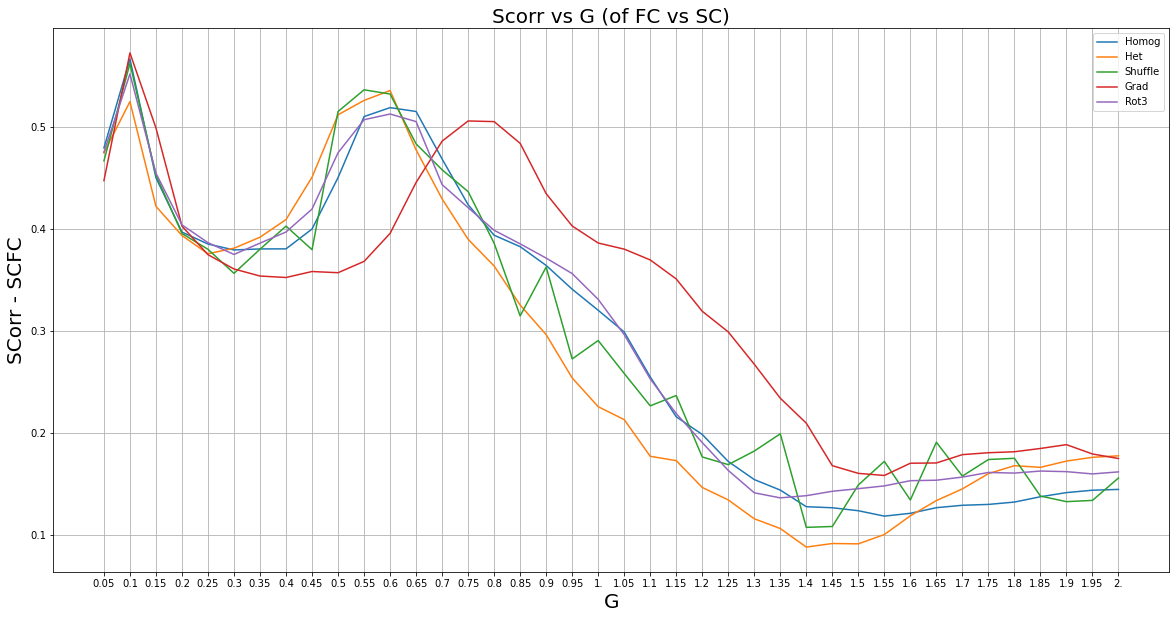

In [23]:
# Graph it: 
plt.plot(S0[0],S0[1])
plt.plot(S1[0],S1[1])
plt.plot(S2[0],S2[1])
plt.plot(S3[0],S3[1])
plt.plot(S4[0],S4[1])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - SCFC', fontsize=20)
plt.title('Scorr vs G (of FC vs SC)', fontsize=20)
plt.grid()
plt.legend(("Homog","Het","Shuffle","Grad","Rot3"))
plt.show()

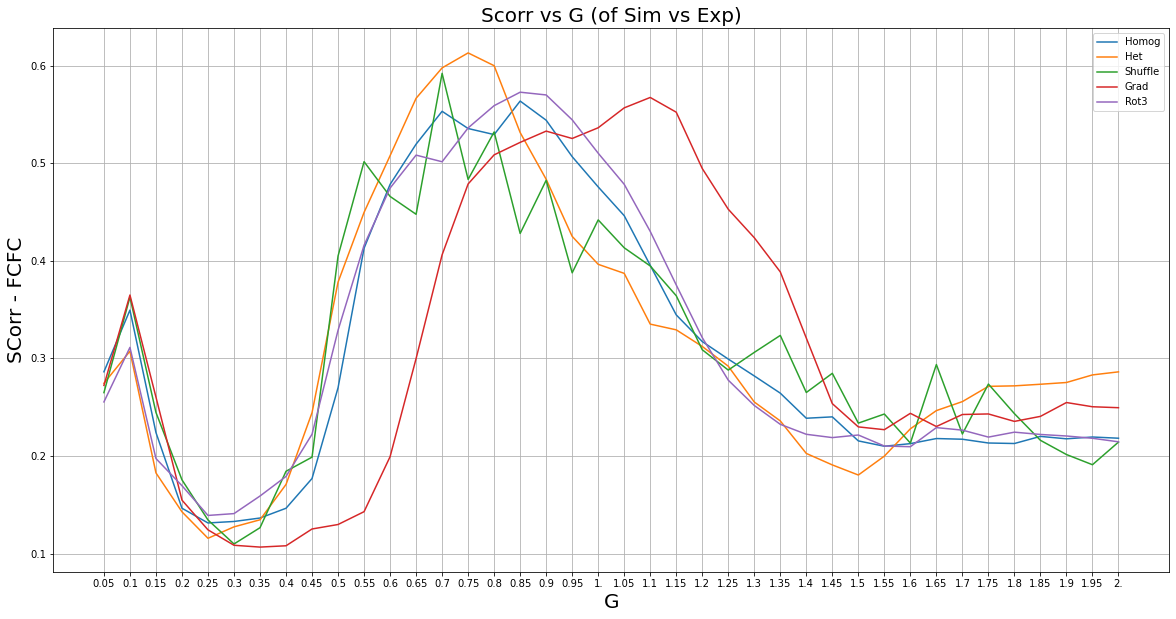

In [25]:
# Graph it: 
plt.plot(S0[0],S0[2])
plt.plot(S1[0],S1[2])
plt.plot(S2[0],S2[2])
plt.plot(S3[0],S3[2])
plt.plot(S4[0],S4[2])
plt.xlabel('G', fontsize=20)
plt.ylabel('SCorr - FCFC', fontsize=20)
plt.title('Scorr vs G (of Sim vs Exp)', fontsize=20)
plt.grid()
plt.legend(("Homog","Het","Shuffle","Grad","Rot3"))
plt.show()

In [ ]:
# FCFC Shuffle
ParamsDict["ExportSim"] = False 
ParamsDict["Simul_length"] = 1.2e4

# First we must shuffle it randomly. 
# Let's Pause by X seconds to make sure the random stuff is working (based on  sys time after all)
time.sleep(i)

df = pd.read_csv("CortexDensitiesAlter.csv",delimiter=",")
E_pop = df.excitatory.values
I_pop = df.inhibitory.values
E_mean = np.mean(E_pop)
I_mean = np.mean(I_pop)

# E_normalised is (when excluding region 7) -0.28 to 0.54
E_norm = (E_pop-E_mean)/E_mean
# I_normalised is (when excluding region 7) -0.45 to 1.44
I_norm = (I_pop-I_mean)/I_mean

# Shuffled:
perm = numpy.random.permutation(len(E_norm))
E_normalised = E_norm[perm]
I_normalised = I_norm[perm]

# Heterogeneous Coupling Constants (array)
ParamsDict["MODEL_c_ie"] = h_ie * (1 + sigma * E_normalised) 
ParamsDict["MODEL_c_ee"] = h_ee  * (1 + sigma * E_normalised) 
ParamsDict["MODEL_c_ii"] = h_ii  * (1 + sigma * I_normalised) 
ParamsDict["MODEL_c_ei"] = h_ei  * (1 + sigma * I_normalised) 

Best_Score = 0 
Best_G = 0
Best_Sigma = 0  

# Sweep across the range of Sigma values:
for I in np.arange(6):

    ParamsDict["sigma"] =I*0.2
    sigma = ParamsDict["sigma"] 
    
    # Sweep across the range of G values
    for J in np.arange(41):
        ParamsDict["G"] = J * 0.05

        ParamsDict["MODEL"] = models.WilsonCowan(c_ee=ParamsDict["MODEL_c_ee"],c_ei=ParamsDict["MODEL_c_ei"],c_ie=ParamsDict["MODEL_c_ie"] ,c_ii=ParamsDict["MODEL_c_ii"],
                                            a_e=numpy.array([1.0]),a_i=numpy.array([1.0]),b_e=numpy.array([1.5]),b_i=numpy.array([2.8]),tau_e=numpy.array([10.0]),
                                            tau_i=numpy.array([65.0])) 
        Score = Simul_Pipeline(ParamsDict=ParamsDict)[2]

        # If the score is the best score, store it. 
        if Score > Best_Score:
            Best_Score = Score
            Best_G = ParamsDict["G"]
            Best_Sigma = ParamsDict["Sigma"]         

# Now export the information:
time_now = time.strftime("%Y%m%d-%H%M%S")
np.savetxt("do-not-track/" + str(i) + "_" + ParamsDict["name"] + "_Best_" + time_now + "_.csv", [Best_Score,Best_G,Best_Sigma], delimiter="\t")
np.savetxt("do-not-track/" + str(i) + "_" + ParamsDict["name"] + "_EIHet_" + time_now + "_.csv", [E_normalised,I_normalised], delimiter="\t")

In [3]:
df = pd.read_csv("CortexDensitiesAlter.csv",delimiter=",")
E_pop = df.excitatory.values
I_pop = df.inhibitory.values
E_mean = np.mean(E_pop)
I_mean = np.mean(I_pop)

# E_normalised is (when excluding region 7) -0.28 to 0.54
E_norm = (E_pop-E_mean)/E_mean
# I_normalised is (when excluding region 7) -0.45 to 1.44
I_norm = (I_pop-I_mean)/I_mean

# Shuffled:
perm = numpy.random.permutation(len(E_norm))
E_normalised = E_norm[perm]
I_normalised = I_norm[perm]

In [2]:
SCorr_Files = glob.glob(r"D:\Simulations\2020_09_10\*Scorr*.csv")

In [3]:
SCorr_Files

5413_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.2_MouseCortex_Scorr_20200908-030809_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.2_MouseCortex_Scorr_20200908-195510_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.4_MouseCortex_Scorr_20200908-040832_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.4_MouseCortex_Scorr_20200908-205646_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.6000000000000001_MouseCortex_Scorr_20200908-050841_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.6000000000000001_MouseCortex_Scorr_20200908-215817_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.8_MouseCortex_Scorr_20200908-060841_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i0.8_MouseCortex_Scorr_20200908-225938_.csv',
 'D:\\Simulations\\2020_09_10\\LCycleCut_G[0.8]sig_e0.2sig_i1.0_MouseCortex_Scorr_20200908-070850_.csv',
 'D:\\Simulat

In [4]:

SCFC = []
FCFC = []
G_value = []

# Loop to populate the empty array with the numbers from the Scorr csv files:

for item in SCorr_Files:
    a = np.genfromtxt(item)
    SCFC.append(a[0])
    FCFC.append(a[2])
    G_value.append(par_extract(item))

print(FCFC)

[0.43404205233290694, 0.41040335349496565, 0.39105423918806703, 0.40053289754228766, 0.42757887465533645, 0.4180854299531803, 0.4467490091572787, 0.43167388059678763, 0.39962983352867365, 0.39586784539045256, 0.41860636436506404, 0.4089435672328437, 0.45314300784986505, 0.43679361294764124, 0.42012866763123224, 0.41961894484580514, 0.41704242371803335, 0.39456018790036, 0.4932078362363221, 0.4591842465274172, 0.4372594641512815, 0.40288993889562036, 0.4209774608733025, 0.41428095137556203, 0.45746825835202704, 0.44781805398865293, 0.4404871126720729, 0.42217751112251234, 0.4010153630764378, 0.3786358598794487, 0.4717349717744258, 0.4562372948863914, 0.4224269698111725, 0.3819149356433347, 0.3810946589294258, 0.3920305037483291, 0.20693300982103952, 0.1850464119697924, 0.21064807973984967, 0.29395156110219633, 0.4483534091519573, 0.37411574643485007, 0.2436333753464662, 0.1852097117464434, 0.16757061420519168, 0.1827520907296809, 0.332754797159437, 0.338989680124376, 0.28104519168986936

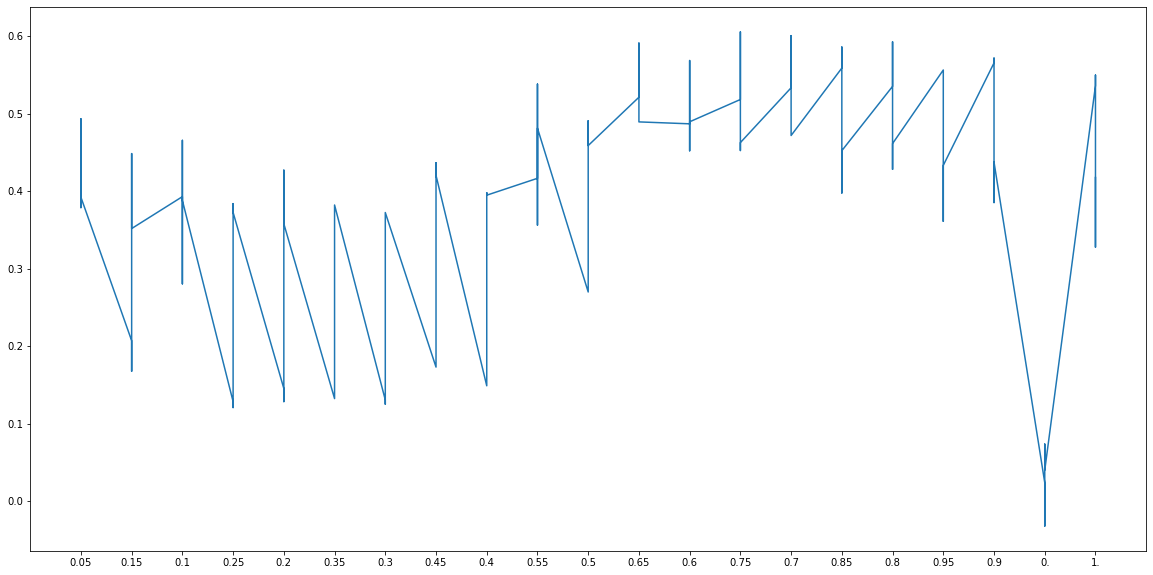

In [8]:
plt.plot(G_value,FCFC)
#plt.xticks(np.arange(20))

## Numerical Solution of Stationary States

In [2]:
def sig(v):
    # Sigmoid function
    return 1/(1 + np.exp(-v))

# Fixed pt - J_i=0,b_e=3,b_i=3.7,a_e=1,a_i=1,w_ee=12,w_ei=15,w_ie=10,w_ii=8,
# LCycle - J_i=0,b_e=2,b_i=2.8,a_e=1,a_i=1,w_ee=11,w_ei=10,w_ie=10,w_ii=1,
# LCycleH - J_i=0,b_e=3,b_i=4,a_e=1.3,a_i=2,w_ee=16,w_ei=12,w_ie=15,w_ii=3,
# Jump - J_i=0,b_e=5,b_i=3.7,a_e=1.3,a_i=2,w_ee=11,w_ei=10,w_ie=10,w_ii=1,



def func(z,J_e,J_i=0,b_e=5,b_i=3.7,a_e=1.3,a_i=2,w_ee=16,w_ei=12,w_ie=10,w_ii=3,):
    # Initialise the function array.
    f = np.zeros(2)

    E = z[0]
    I = z[1]

    # Wilson Cowan Equations setting derivative = 0 
    f[0] = -E + (1 - E)*sig(a_e*(w_ee*E - w_ei*I - b_e + J_e))
    f[1] = -I + (1 - I)*sig(a_i*(w_ie*E - w_ii*I - b_i + J_i))

    return f

In [3]:
J_e = np.arange(0,5,0.1)
array = []

for i in J_e:
    
    array_2 = []

    sol = fsolve(func,[0.5,0.2],i,maxfev=100000)
    # func(root) should be almost 0.0.
    if all(np.isclose(func(sol,i), [0.0, 0.0])):
        # Get only E value
        array_2.append(sol[0])
    else:
        array_2.append(np.nan)    

    sol = fsolve(func,[0,0],i,maxfev=100000)
    # func(root) should be almost 0.0.
    if all(np.isclose(func(sol,i), [0.0, 0.0])):
        # Get only E value
        array_2.append(sol[0])
    else:
        array_2.append(np.nan)    

    sol = fsolve(func,[0.45,0.15],i,maxfev=100000)
    # func(root) should be almost 0.0.
    if all(np.isclose(func(sol,i), [0.0, 0.0])):
        # Get only E value
        array_2.append(sol[0])
    else:
        array_2.append(np.nan)    

    # Then put the array at the end of the run
    array.append(array_2)

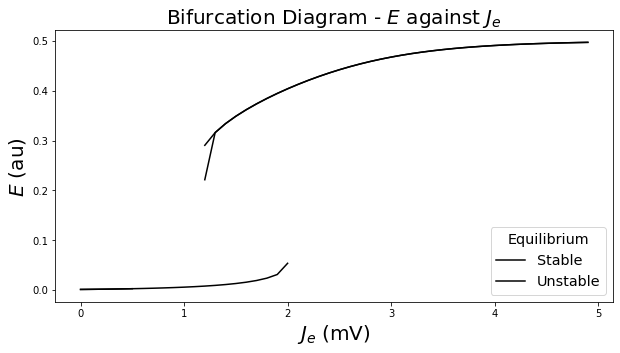

In [4]:
plt.plot(J_e,array,'k',)
plt.legend(('Stable','Unstable'),title="Equilibrium",loc="lower right",title_fontsize="x-large",fontsize="x-large")

#plt.vlines(x=0,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(0,0.5,"$B_e$=5",fontsize=14)

#plt.vlines(x=1,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(1,0.5,"$B_e$=4",fontsize=14)

#plt.vlines(x=2,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(2,0.5,"$B_e$=3",fontsize=14)

#plt.vlines(x=3,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(3,0.5,"$B_e$=0",fontsize=14)

plt.xlabel("$J_e$ (mV)", fontsize=20)
plt.ylabel("$E$ (au) ", fontsize=20)
plt.title("Bifurcation Diagram - $E$ against $J_e$", fontsize=20)
plt.show()


In [5]:
J_e = np.arange(0,5,0.05)
array = []
array_3 = []

for i in J_e:
    
    array_2 = []

    for j in np.arange(100):
        # Brute force try random ones:
        sol = fsolve(func,[random.random()/2,random.random()/2],i,maxfev=100000)
        # func(root) should be almost 0.0.
        if all(np.isclose(func(sol,i), [0.0, 0.0])):
            # Get only E value
            array_2.append(sol[0])
        else:
            array_2.append(np.nan)    

    # Then add the median, max, and min to the end of array

    if i < 2.35:
        MAX = np.nan
        MIN = np.nanmin(array_2)
        #MID = np.median(array_2)

    if i > 1.1:
        MAX = np.nanmax(array_2)

    if i > 2:
        MIN= np.nan

    '''
    for k in array_2:
        if (np.isclose(k,MAX)):
            #Do nothing
            dummy = 1
        else:
            MID = k

    '''
    array.append([MAX,MIN])
    array_3.append(array_2)

array = np.array(array)
array_3 = np.array(array_3)

In [6]:
super_threshold_indices = (array_3 < 0.07) 
array_3[super_threshold_indices] = np.nan
super_threshold_indices = (array_3 > 0.28)
array_3[super_threshold_indices] = np.nan

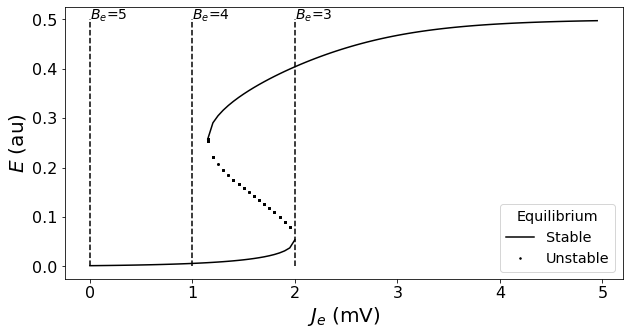

In [8]:
plt.plot(J_e,array[:,0],'k',)
plt.plot(J_e,array_3,'k.',markersize=3)
plt.plot(J_e,array[:,1],'k')
plt.legend(('Stable','Unstable'),title="Equilibrium",loc="lower right",title_fontsize="x-large",fontsize="x-large")

plt.vlines(x=0,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(0,0.5,"$B_e$=5",fontsize=14)

plt.vlines(x=1,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(1,0.5,"$B_e$=4",fontsize=14)

plt.vlines(x=2,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(2,0.5,"$B_e$=3",fontsize=14)

#plt.vlines(x=3,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
#plt.text(3,0.5,"$B_e$=0",fontsize=14)

plt.xlabel("$J_e$ (mV)", fontsize=20)
plt.ylabel("$E$ (au)", fontsize=20)
plt.xticks(fontsize=16, )
plt.yticks(fontsize=16, )

plt.savefig("do-not-track\\Fig.pdf",bbox_inches='tight')
plt.show()


## Bifurcation Diagram Generation

In [9]:
# Define the Wilson Cowan Equations

def sig(v):
    # Sigmoid function
    return 1/(1 + np.exp(-v))

# Fixed pt - J_i=0,b_e=3,b_i=3.7,a_e=1,a_i=1,w_ee=12,w_ei=15,w_ie=10,w_ii=8,
# LCycle - J_i=0,b_e=2,b_i=2.8,a_e=1,a_i=1,w_ee=11,w_ei=10,w_ie=10,w_ii=1,
# LCycleH - J_i=0,b_e=3,b_i=4,a_e=1.3,a_i=2,w_ee=16,w_ei=12,w_ie=15,w_ii=3,

def func(z,t,J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,_tau_i):
    # Initialise the function array.
    f = np.zeros(2)

    E = z[0]
    I = z[1]

    # Wilson Cowan Equations setting derivative = 0 
    f[0] = (-E + (1 - E)*sig(a_e*(w_ee*E - w_ei*I - b_e + J_e)))/tau_e
    f[1] = (-I + (1 - I)*sig(a_i*(w_ie*E - w_ii*I - b_i + J_i)))/tau_i

    return f

In [12]:
The_max = []
The_min = []

# Parameters
'''
# LCycle
w_ee=11
w_ei=10
w_ie=10
w_ii=1
b_e=3
b_i=2.8
tau_e=10
tau_i=65
a_e=1
a_i=1
#J_e=3.5
J_i=0

'''
# Fixed Pt
w_ee=12
w_ei=15
w_ie=10
w_ii=8
b_e=5
b_i=4
tau_e=10
tau_i=10
a_e=1
a_i=1
#J_e=3.5
J_i=0

'''
# Hysteresis
w_ee=16
w_ei=12
w_ie=10
w_ii=3
b_e=5
#b_e = 2.5
b_i=3.7
tau_e=10
tau_i=10
a_e=1.3
a_i=2
#J_e=3.5
J_i=0
'''
'''
# Jump 
w_ee=11
w_ei=10
w_ie=10
w_ii=1
b_e=5
#b_e = 2.5
b_i=3.7
tau_e=10
tau_i=10
a_e=1.3
a_i=2
#J_e=3.5
J_i=0
'''
# Integrator Settings
length = 10000 
dt = 0.1
t = np.arange(0, length, dt)
J = np.arange(0,5,0.05)

for J_e in J:
    # Solve it! Note that the additional "args" supplied to "odeint" must be in a tuple; "(a,)".
    solut = odeint(func, [0.5, 0.5], t, args=(J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,tau_i) )

    # Obtain the max and min of the last 1/10 (tenth) elements
    eqbm_max = max(solut[-int(length/dt/10):,0])
    eqbm_min = min(solut[-int(length/dt/10):,0])

    The_max.append(eqbm_max)
    The_min.append(eqbm_min)

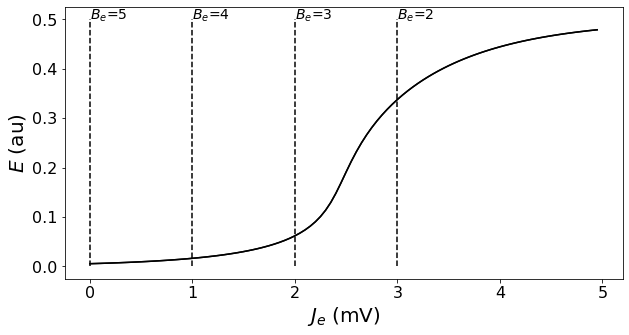

In [13]:
plt.plot(J,The_max,color='k')
plt.plot(J,The_min,color='k')

plt.vlines(x=0,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(0,0.5,"$B_e$=5",fontsize=14)

plt.vlines(x=1,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(1,0.5,"$B_e$=4",fontsize=14)

plt.vlines(x=2,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(2,0.5,"$B_e$=3",fontsize=14)

plt.vlines(x=3,ymin=0,ymax=0.5,colors='k',linestyles='dashed')
plt.text(3,0.5,"$B_e$=2",fontsize=14)

plt.xlabel("$J_e$ (mV)", fontsize=20)
plt.ylabel("$E$ (au)", fontsize=20)
plt.xticks(fontsize=16, )
plt.yticks(fontsize=16, )

plt.savefig("do-not-track\\Fig.pdf",bbox_inches='tight')
plt.show()


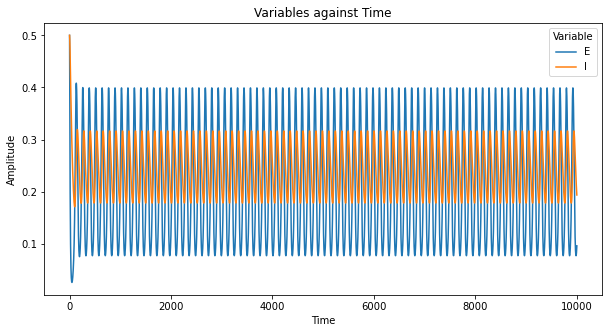

In [5]:
# Check a certain J_e
J_e=2

# Solve it! Note that the additional "args" supplied to "odeint" must be in a tuple; "(a,)".
solut = odeint(func, [0.5, 0.5], t, args=(J_e,J_i,b_e,b_i,a_e,a_i,w_ee,w_ei,w_ie,w_ii,tau_e,tau_i) )

plt.plot(t, solut[:])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Variables against Time")
plt.legend(("E","I"),title="Variable")
plt.show()

## Benchmarking Results vs Literature

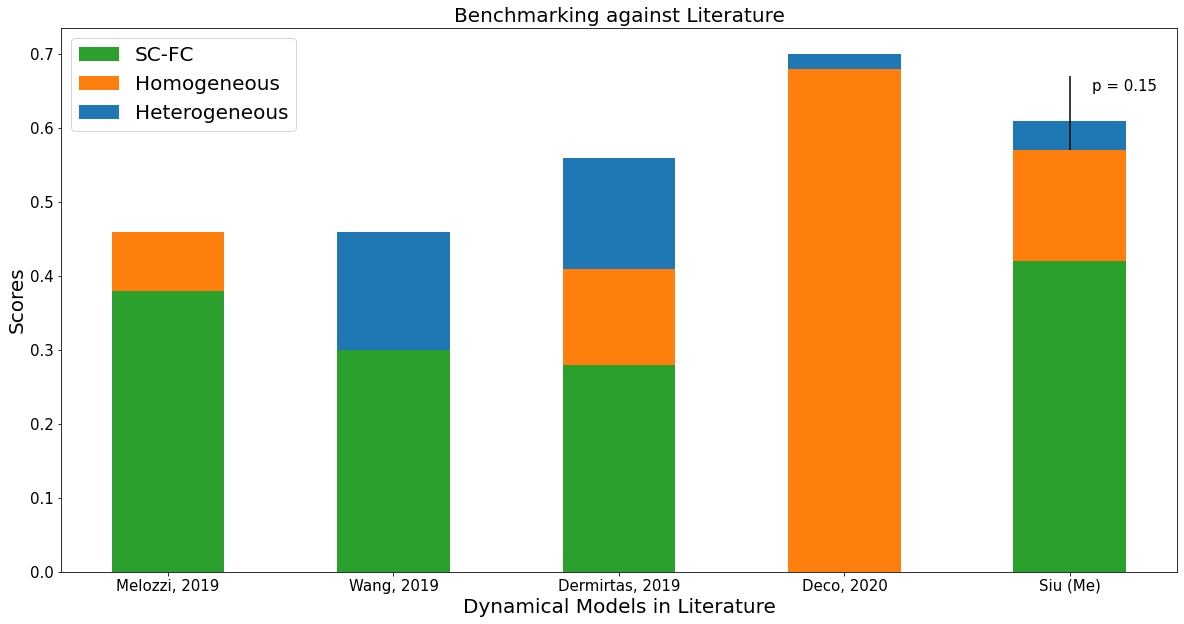

In [111]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
N = 5

SCFC = (0.38, 0.30, 0.28, np.nan, 0.42)
Homog = (0.46 , np.nan, 0.41, 0.68, 0.57)
Het = (np.nan, 0.46, 0.56, 0.70, 0.61)
error = (np.nan,np.nan,np.nan,np.nan,0.04),(np.nan,np.nan,np.nan,np.nan,0.06)
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p3 = plt.bar(ind, Het, width, yerr=error)
p2 = plt.bar(ind, Homog, width,)
p1 = plt.bar(ind, SCFC, width)

plt.ylabel('Scores', fontsize=20)
plt.title('Benchmarking against Literature', fontsize=20)
plt.xticks(ind, ('Melozzi, 2019', 'Wang, 2019', 'Dermirtas, 2019', 'Deco, 2020', 'Siu (Me)',), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Dynamical Models in Literature", fontsize=20)
plt.legend((p1[0], p2[0],p3[0]), ('SC-FC','Homogeneous','Heterogeneous'),loc=2, prop={'size': 20})

plt.annotate("p = 0.15",xy=(4.1,0.65), fontsize=15)

plt.show()

## Error ranges for the simulations

In [4]:
# First Import the Scorrs
# Tag is of form: Hysteresis_i" + str(i) + "Length_e4"

#Regime = "LCycle"
# Import All Files

SCorr_files = glob.glob(r"D:\Simulations\\2020_11_17\\" + "*Scorr*.csv") 
#SCorr_files = glob.glob(r"D:\Simulations\\2020_11_20\\" + "*Scorr*.csv") 

print(SCorr_files)


eCut_i20Length_e6_MouseCortex_Scorr_20201117-075949_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i21Length_e4_MouseCortex_Scorr_20201117-035020_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i21Length_e5_MouseCortex_Scorr_20201117-041454_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i21Length_e6_MouseCortex_Scorr_20201117-082213_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i22Length_e4_MouseCortex_Scorr_20201117-035413_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i22Length_e5_MouseCortex_Scorr_20201117-041847_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i22Length_e6_MouseCortex_Scorr_20201117-082452_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i23Length_e4_MouseCortex_Scorr_20201117-035629_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i23Length_e5_MouseCortex_Scorr_20201117-042106_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i23Length_e6_MouseCortex_Scorr_20201117-082805_.csv', 'D:\\Simulations\\\\2020_11_17\\LCycleCut_i24Length_e4_MouseCortex_Scorr_2020

In [5]:
Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    x = re.findall("2020_11_17.(.*)_i.*Length_e(.)",string)
    #x = re.findall("2020_11_20.(.*)_i.*Length_e(.)",string)

    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df = pd.DataFrame(Params)
df.columns = ['Regime','Sim Length']
df["SCFC"] = SCFC
df["FCFC"] = FCFC

In [6]:
FixedPt = df.loc[df['Regime'] == 'FixedPt']

FixedPt_4 = FixedPt.loc[df['Sim Length'] == '4']["FCFC"]
FixedPt_5 = FixedPt.loc[df['Sim Length'] == '5']["FCFC"]
FixedPt_6 = FixedPt.loc[df['Sim Length'] == '6']["FCFC"]

Hysteresis = df.loc[df['Regime'] == 'Hysteresis']

H_4 = Hysteresis.loc[df['Sim Length'] == '4']["FCFC"]
H_5 = Hysteresis.loc[df['Sim Length'] == '5']["FCFC"]
H_6 = Hysteresis.loc[df['Sim Length'] == '6']["FCFC"]

LCycleReg2 = df.loc[df['Regime'] == 'LCycleReg2']
LC2_4= LCycleReg2.loc[df['Sim Length'] == '4']["FCFC"]
LC2_5 = LCycleReg2.loc[df['Sim Length'] == '5']["FCFC"]
LC2_6 = LCycleReg2.loc[df['Sim Length'] == '6']["FCFC"]

LCycleCut = df.loc[df['Regime'] == 'LCycleCut']

LCC_4 = LCycleCut.loc[df['Sim Length'] == '4']["FCFC"]
LCC_5 = LCycleCut.loc[df['Sim Length'] == '5']["FCFC"]
LCC_6 = LCycleCut.loc[df['Sim Length'] == '6']["FCFC"]

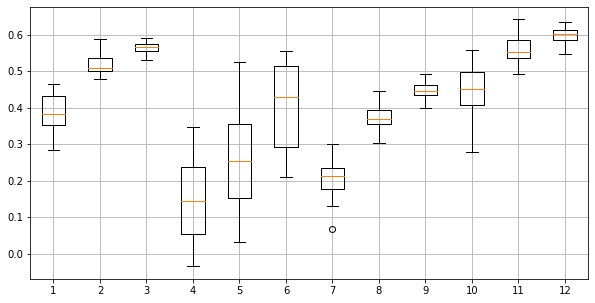

In [7]:
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
plt.boxplot([FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6])
plt.grid()


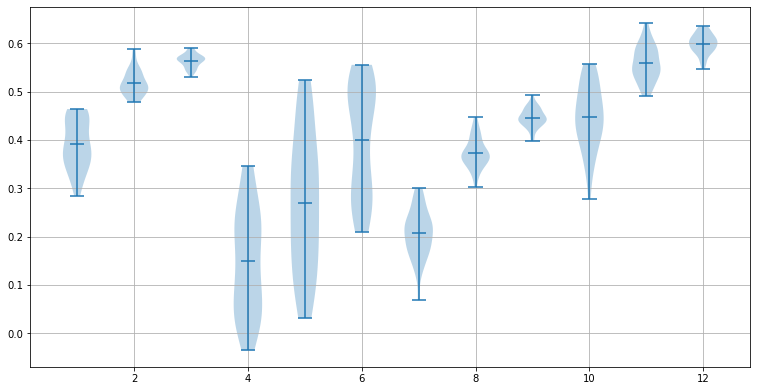

In [8]:
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
data_to_plot = [FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot,showmeans=True,showextrema=True,)
plt.grid()
plt.show()

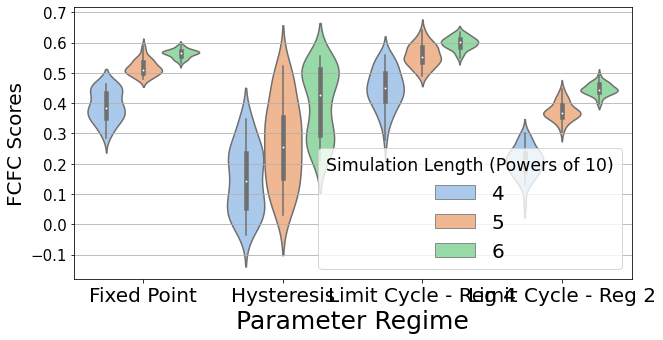

In [9]:
plt.grid()
ax = sns.violinplot(x="Regime", y="FCFC",hue="Sim Length", data=df,scale="width",palette=sns.color_palette("pastel"))

ind = np.arange(4)
plt.ylabel('FCFC Scores', fontsize=20)
#plt.title('Benchmarking against Literature', fontsize=20)
plt.xticks(ind, ('Fixed Point','Hysteresis','Limit Cycle - Reg 4', 'Limit Cycle - Reg 2'), fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("Parameter Regime", fontsize=25)
plt.legend(title = "Simulation Length (Powers of 10)",loc=4, prop={'size': 20},title_fontsize='xx-large')


In [11]:
np.std(FixedPt_5)

0.02552488347693183

In [14]:
for i in [FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6]:
    print(np.std(i))

0.05025215623926126
0.02552488347693183
0.013731652411139623
0.10790637647836097
0.13823265586202238
0.11291647421529871
0.04854406985801267
0.030566482357376117
0.019550179574919314
0.0655180931124347
0.03609549176497805
0.02044391707207729


In [17]:
for i in [FixedPt_4,FixedPt_5,FixedPt_6,H_4,H_5,H_6,LC2_4,LC2_5,LC2_6,LCC_4,LCC_5,LCC_6]:
    print(stats.iqr(i)/2)

0.040670114038692945
0.017673098017136513
0.00903323993357924
0.09212497998105196
0.10128110096546931
0.10977455795573052
0.028689699043995598
0.01884260064643556
0.013623690085459245
0.045060176678578034
0.025098566343733253
0.013154243849422598


In [16]:
stats.iqr(i)

0.026308487698845195

(array([1., 3., 0., 5., 5., 5., 7., 9., 1., 5.]),
 array([0.54776341, 0.55649472, 0.56522603, 0.57395734, 0.58268865,
        0.59141996, 0.60015127, 0.60888258, 0.61761389, 0.6263452 ,
        0.63507651]),
 <a list of 10 Patch objects>)

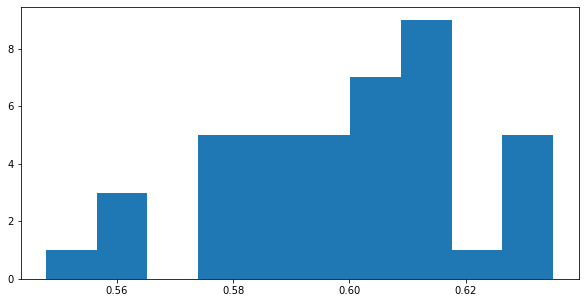

In [21]:
plt.hist(LCC_6)

In [27]:
SCorr_files = glob.glob(r"D:\Simulations\\2020_11_20\\" + "*Scorr*.csv") 

Params = []
SCFC = []
FCFC = []
for string in SCorr_files:

    # Obtain Parameter Values
    #x = re.findall("2020_11_17.(.*)_i.*Length_e(.)",string)
    x = re.findall("2020_11_20.(.*)_i.*Length_e(.)",string)

    Params.append(x[0])

    # FCFC and SCFC
    a = np.genfromtxt(string)
    SCFC.append(a[0])
    FCFC.append(a[2])

df2 = pd.DataFrame(Params)
df2.columns = ['Regime','Sim Length']
df2["SCFC"] = SCFC
df2["FCFC"] = FCFC

In [37]:
Het_5 = df2.loc[df['Sim Length'] == '5']["FCFC"]
Het_6 = df2.loc[df['Sim Length'] == '6']["FCFC"]
for i in [Het_5,Het_6]:
    print(stats.iqr(i)/2)

0.023253481976751866
0.012231011094737121
